<a href="https://colab.research.google.com/github/ArchanGhosh/Neural-Network-Examples-and-Practices/blob/master/CAL_HOUSING_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras 
from sklearn.datasets import  fetch_california_housing
from sklearn.preprocessing import StandardScaler


In [0]:
housing = fetch_california_housing()

In [0]:
type(housing)

sklearn.utils.Bunch

In [0]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [0]:
housing.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [0]:
housing_df = pd.DataFrame(np.c_[housing.data, housing.target.reshape(-1,1)], columns=housing.feature_names + ['median_housing_price'] )

In [0]:
housing_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_housing_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ae9c3160>,
      dtype=object)

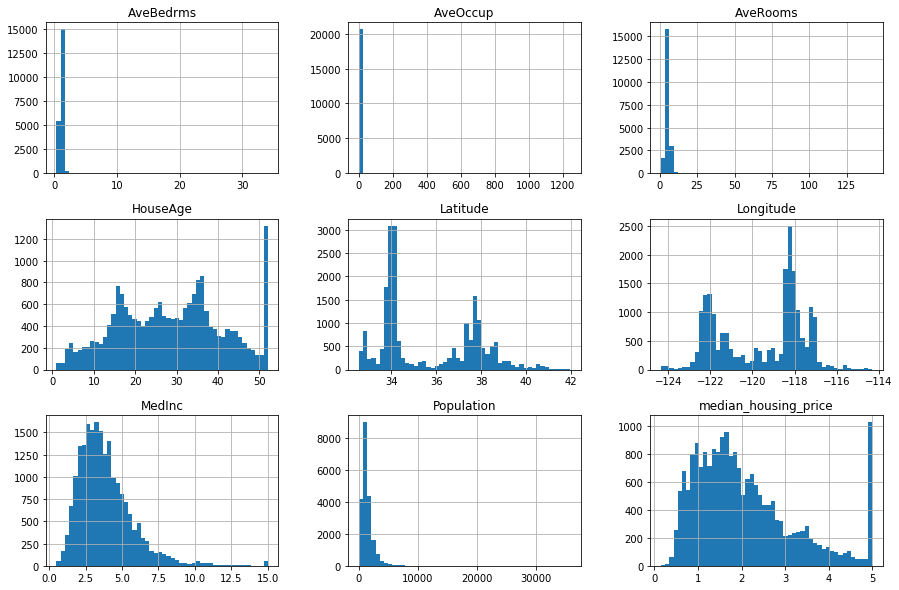

In [0]:
housing_df.hist(bins=50, figsize=[15,10])

In [0]:
housing_df['MedInc']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [0]:
corr = housing_df.corr()

In [0]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_housing_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_housing_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [0]:
corr['median_housing_price'].sort_values(ascending=False)

median_housing_price    1.000000
MedInc                  0.688075
AveRooms                0.151948
HouseAge                0.105623
AveOccup               -0.023737
Population             -0.024650
Longitude              -0.045967
AveBedrms              -0.046701
Latitude               -0.144160
Name: median_housing_price, dtype: float64

In [0]:
np.ceil(housing_df['MedInc']/1.5).value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: MedInc, dtype: int64

In [0]:
housing_df['income_cat'] =np.ceil( housing_df['MedInc']/1.5)

In [0]:
housing_df['income_cat'].where(housing_df['income_cat']<5.0, 5.0, inplace=True)

In [0]:
housing_df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [0]:
housing_df['income_cat'].value_counts() / len(housing_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [0]:
for train_full_ix, test_ix in strat_split.split(housing_df, housing_df['income_cat']):
  train_split_full = housing_df.iloc[train_full_ix]
  test_split = housing_df.iloc[test_ix]
  for train_ix, valid_ix in strat_split.split(train_split_full, train_split_full['income_cat']):
    train_split=train_split_full.iloc[train_ix]
    valid_split=train_split_full.iloc[valid_ix]

In [0]:
train_split['income_cat'].value_counts() / len(train_split)

3.0    0.350594
2.0    0.318873
4.0    0.176319
5.0    0.114392
1.0    0.039821
Name: income_cat, dtype: float64

In [0]:
train_split = train_split.drop('income_cat' , axis=1)

In [0]:
test_split = test_split.drop('income_cat', axis=1)

In [0]:
valid_split=valid_split.drop('income_cat', axis=1)

In [0]:
X_train = train_split.drop('median_housing_price', axis=1)

In [0]:
y_train = train_split['median_housing_price']

In [0]:
X_test = test_split.drop('median_housing_price', axis=1)

In [0]:
y_test = test_split['median_housing_price']

In [0]:
X_valid = valid_split.drop('median_housing_price', axis=1)

In [0]:
y_valid = valid_split['median_housing_price']

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)

In [0]:
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
X_valid_scaled=scaler.fit_transform(X_valid)

In [0]:
model = keras.Sequential()

In [0]:
model.add(keras.layers.InputLayer(input_shape=X_train_scaled.shape[1:]))

In [0]:
# model.add(keras.layers.Dense(100, activation= 'relu'))

In [0]:
type(keras.activations.relu)

function

In [0]:
keras.activations.relu(5)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [0]:
model.add(keras.layers.Dense(100, activation= keras.activations.relu))

In [0]:
model.add(keras.layers.Dense(1))

In [0]:
# model.compile(loss = 'mean_squared_error' , optimizer ='sgd', metrics=['mse'])

In [0]:
model.compile(loss = keras.losses.mean_squared_error , optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics=[keras.metrics.mae])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers

In [0]:
hidden1=model.layers[0]

In [0]:
hidden1.name

'dense'

In [0]:
weights,biases= hidden1.get_weights()

In [0]:
weights.shape

(8, 100)

In [0]:
biases.shape

(100,)

In [0]:
hidden1.activation

<function tensorflow.python.keras.activations.relu>

In [0]:
hidden1.activity_regularizer

In [0]:
hidden1.kernel_initializer

In [0]:
hidden1.bias_initializer

In [0]:
history=model.fit(X_train_scaled, y_train, validation_data=[X_valid_scaled, y_valid.values], epochs=30)

Train on 13209 samples, validate on 3303 samples
Epoch 1/30
13209/13209 [==============================] - 1s 101us/sample - loss: 0.7903 - mean_absolute_error: 0.6209 - val_loss: 4.1648 - val_mean_absolute_error: 0.5878
Epoch 2/30
13209/13209 [==============================] - 1s 57us/sample - loss: 1.2905 - mean_absolute_error: 0.5478 - val_loss: 0.4897 - val_mean_absolute_error: 0.5112
Epoch 3/30
13209/13209 [==============================] - 1s 57us/sample - loss: 0.5397 - mean_absolute_error: 0.4894 - val_loss: 0.4666 - val_mean_absolute_error: 0.4777
Epoch 4/30
13209/13209 [==============================] - 1s 54us/sample - loss: 0.4244 - mean_absolute_error: 0.4660 - val_loss: 0.4355 - val_mean_absolute_error: 0.4631
Epoch 5/30
13209/13209 [==============================] - 1s 58us/sample - loss: 0.4108 - mean_absolute_error: 0.4566 - val_loss: 0.4313 - val_mean_absolute_error: 0.4519
Epoch 6/30
13209/13209 [==============================] - 1s 57us/sample - loss: 0.4024 - mean_

In [0]:
type(y_train.values)

numpy.ndarray

In [0]:
type(y_test)

pandas.core.series.Series

In [0]:
history.history

{'loss': [0.790282233530842,
  1.2904607679631999,
  0.5397197933496286,
  0.42444869538604,
  0.41081145058086865,
  0.4024134602605534,
  0.39884341057302264,
  0.39803977821125774,
  0.38482114449295707,
  0.3756449161421315,
  0.3803275930469967,
  0.3708440906387444,
  0.3660627272273637,
  0.3611614214364563,
  0.366523825226116,
  0.353695245853244,
  0.34963440276878105,
  0.3499398309503644,
  0.348602472970953,
  0.34436989625204756,
  0.3397724694420165,
  0.33834989501242474,
  0.3546418286326959,
  0.3331340629057769,
  0.3328377406750018,
  0.3387999195746248,
  0.3281661101073101,
  0.32538134601251734,
  0.33413653188054465,
  0.3232957067695571],
 'mean_absolute_error': [0.62089866,
  0.54783607,
  0.48941866,
  0.46596253,
  0.4565896,
  0.44958627,
  0.4452724,
  0.44416034,
  0.43847227,
  0.4329548,
  0.43155414,
  0.43004352,
  0.42685607,
  0.4232823,
  0.42400178,
  0.4196287,
  0.41620728,
  0.41626722,
  0.41469768,
  0.41239157,
  0.40933976,
  0.40728608,
  

In [0]:
history_df=pd.DataFrame(history.history)

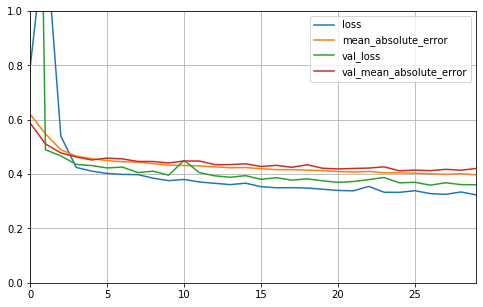

In [0]:
history_df.plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test_scaled, y_test.values, verbose=2)

4128/4128 - 0s - loss: 2.1048 - mean_absolute_error: 1.0484


[2.104796589344971, 1.048411]

In [0]:
model.predict(X_test_scaled[:10])

array([[6.3557463],
       [3.7400317],
       [4.0368075],
       [1.5218441],
       [1.029124 ],
       [2.1748166],
       [1.138199 ],
       [4.798982 ],
       [1.2560058],
       [1.6846797]], dtype=float32)

In [0]:
y_test[:10]

5241     5.00001
10970    2.40300
20351    2.18200
6568     1.82100
13285    1.21300
20552    1.20600
19989    0.72300
17049    5.00001
13692    0.98900
13916    0.82600
Name: median_housing_price, dtype: float64

In [0]:
y_train[:10]

8739     3.62600
2383     1.07600
9267     0.61700
15416    0.98600
18542    2.34400
15615    5.00001
7379     1.15100
20100    0.68200
9002     1.83000
9700     1.35200
Name: median_housing_price, dtype: float64